In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My\ Drive/hbi2019/Gmax

/content/gdrive/My Drive/hbi2019/Gmax


In [4]:
ls

glyma.Wm82.gnm2.div.S3DM.CultivarList.txt.gz
glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz
glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz.gt_sub.filterbyMAF.pkl
glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz.gt_sub.pkl
glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz.pkl


In [0]:
import pandas as pd
import numpy as np

In [0]:
pd.__version__

# day9에서 downgrade 했지만 런타임 초기화를 하니 다시 돌아와있는 모습

'0.25.3'

In [0]:
df_soy = pd.read_pickle('./glyma.Wm82.gnm2.div.S3DM.SNPdata.vcf.gz.gt_sub.filterbyMAF.pkl')

In [7]:
df_soy.head()

,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,426,305,306,428,307,429,308,61-1,430,...,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2,maf
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_284820,CC,CC,GG,GG,GG,GG,CC,GC,CC,CC,CC,CC,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,CC,GG,GG,GG,GG,GG,GG,CC,NN,GG,NN,GC,CC,...,CG,GG,GG,GG,GG,GG,GG,GG,CC,GG,CC,NN,GG,CG,GG,CC,CC,GG,CC,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG,0.239305
S1_377146,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,TT,TT,NN,CC,TT,NN,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,...,CC,CC,TT,CC,CC,TT,CC,CC,CC,CC,CC,NN,CC,CT,TT,CC,CC,TT,CC,CC,NN,CC,NN,TT,TT,CC,CC,CC,CC,CC,CC,TT,TT,NN,TT,CC,CC,CC,CC,0.106952
S1_702173,AA,AA,AA,AA,NN,AA,NN,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,NN,AA,AA,TT,TT,AA,AA,TT,NN,AA,AA,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,NN,TT,AA,AA,TT,NN,AA,AA,AA,NN,NN,AA,TT,TT,AA,NN,TT,AA,AT,AA,NN,AA,TT,TT,AA,TT,TT,AA,AA,AA,TT,TT,NN,TT,AA,AA,AA,AA,0.140374
S1_1425419,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,TT,CC,CT,TT,CC,NN,CC,CC,CC,CC,...,CC,TT,CC,CC,TT,CC,CC,CC,NN,CC,CC,NN,CC,CC,CC,NN,CC,CC,TT,TC,NN,CC,CC,CC,CC,TT,TT,TT,TT,CC,CC,CC,CC,TC,TC,CC,CC,CC,CC,0.176471
S1_1425452,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,NN,CC,CC,CC,CC,...,CC,TT,CC,CC,TT,CC,CC,CC,NN,CC,CC,NN,CC,CC,CC,NN,CC,CC,TT,TC,NN,CC,CC,CC,CC,CC,TT,TT,CC,CC,CC,CC,CC,TC,TC,CC,CC,CC,CC,0.128342


In [8]:
df_soy.shape

(2984, 375)

* Linkage Disequilibrium (Mendelian Segregation particulate inheritance) <br />
soybean 경우 20개의 chromosome(20 particle) 있음 <br />
그렇게 많은 diversity를 지닌 표현형을 어떻게 20개의 particle로 설명 할 수있나? <br />
chromosome내엔 다양한 gene이 있음 그들은 서로 dependent함 <br />(physical distance가 매우 짧음 = > working together, but if it is too far, they don't work together) <br />
이 gene간의 관계로부터 recombination rate를 계산할 수 있음 (r) <br />
allele frq, gamete(생식세포, 모든 locus의 allele이 결정되어 있는 애들) frq <br />
locus가 A, B로 있을때.. <br /> <br />
A1 &nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp; A2 <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp; <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp; <br />
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp; <br />
B1 &nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp; B2
<br /><br />
A1B1 frq : g11, <br />
A2B2 frq : g22, <br />
A1B2 frq : g12, <br />
A2B1 frq : g21 <br /> <br />
D (disequilizion) = (g11 x g22) - (g12 x g21)

In [9]:
df_soy.loc[['S1_284820', 'S1_377146']] 

# we cannot distinquish gamete's position (A1자리인지 A2자리인지 구별불가, CC가 A1A2인지 A2A1인지 구별 불가)

,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,426,305,306,428,307,429,308,61-1,430,...,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2,maf
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_284820,CC,CC,GG,GG,GG,GG,CC,GC,CC,CC,CC,CC,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,CC,GG,GG,GG,GG,GG,GG,CC,NN,GG,NN,GC,CC,...,CG,GG,GG,GG,GG,GG,GG,GG,CC,GG,CC,NN,GG,CG,GG,CC,CC,GG,CC,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG,0.239305
S1_377146,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,TT,TT,NN,CC,TT,NN,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,...,CC,CC,TT,CC,CC,TT,CC,CC,CC,CC,CC,NN,CC,CT,TT,CC,CC,TT,CC,CC,NN,CC,NN,TT,TT,CC,CC,CC,CC,CC,CC,TT,TT,NN,TT,CC,CC,CC,CC,0.106952


In [10]:
df_soy.loc[['S1_284820', 'S1_377146']].values

array([['CC', 'CC', 'GG', 'GG', 'GG', 'GG', 'CC', 'GC', 'CC', 'CC', 'CC',
        'CC', 'GG', 'GG', 'GG', 'GG', 'GG', 'GG', 'NN', 'GG', 'GG', 'GG',
        'NN', 'GG', 'GG', 'GG', 'GG', 'CC', 'GG', 'GG', 'GG', 'GG', 'GG',
        'GG', 'CC', 'NN', 'GG', 'NN', 'GC', 'CC', 'GG', 'GG', 'GG', 'GG',
        'GG', 'CC', 'CC', 'NN', 'CC', 'GG', 'NN', 'NN', 'GG', 'GG', 'GG',
        'GG', 'GG', 'NN', 'GG', 'CC', 'GG', 'GG', 'GG', 'GG', 'GG', 'GG',
        'CC', 'GG', 'GG', 'GG', 'CG', 'GG', 'GG', 'GG', 'GG', 'GC', 'CG',
        'GG', 'GG', 'GG', 'CC', 'GG', 'GG', 'GG', 'GG', 'GG', 'GG', 'GG',
        'GG', 'CC', 'GG', 'GG', 'NN', 'GG', 'CC', 'GG', 'GG', 'CC', 'CC',
        'GG', 'GG', 'GG', 'CG', 'NN', 'GG', 'CC', 'GG', 'GG', 'CC', 'GG',
        'GG', 'NN', 'GG', 'NN', 'GG', 'GG', 'GG', 'GG', 'GG', 'GG', 'GG',
        'GG', 'CC', 'GG', 'GG', 'GG', 'GG', 'GG', 'NN', 'GG', 'GG', 'GG',
        'CC', 'GG', 'GG', 'GG', 'GG', 'GG', 'GG', 'GG', 'CC', 'GG', 'CC',
        'CC', 'CC', 'CC', 'CC', 'GG', 

In [0]:
locusA = df_soy.loc[['S1_284820', 'S1_377146']].values[0,:] # S1_284820 의 value 값들
locusB = df_soy.loc[['S1_284820', 'S1_377146']].values[1,:] # S1_377146 의 value 값들

[*zip(locusA,locusB)] 

# 각 chromosome(S1_284820, S1_377146)의 genotype을 같은 sample끼리 묶어줌
# GG와 CC의 쌍을 만들 때, ('GG', 'CC')나 ('CC', 'GG')는 동일하다보고 하나만 나태내어줌
# 이때 만약 ('CC', 'CC')라면 gamete는 CC로 다 동일하지만 recombination 경우의 수는 4가지(A1B1, A1B2, A2B1, A2B2)가 가능

[('CC', 'CC'),
 ('CC', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'NN'),
 ('GG', 'CC'),
 ('CC', 'CC'),
 ('GC', 'CC'),
 ('CC', 'CC'),
 ('CC', 'CC'),
 ('CC', 'CC'),
 ('CC', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'NN'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('NN', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'TT'),
 ('NN', 'TT'),
 ('GG', 'NN'),
 ('GG', 'CC'),
 ('GG', 'TT'),
 ('GG', 'NN'),
 ('CC', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('CC', 'CC'),
 ('NN', 'NN'),
 ('GG', 'CC'),
 ('NN', 'CC'),
 ('GC', 'CC'),
 ('CC', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('CC', 'NN'),
 ('CC', 'CC'),
 ('NN', 'NN'),
 ('CC', 'NN'),
 ('GG', 'CC'),
 ('NN', 'CC'),
 ('NN', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('NN', 'CC'),
 ('GG', 'CC'),
 ('CC', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('CC', 'C

In [0]:
locusA = df_soy.loc[['S1_284820', 'S1_377146']].values[0,:]
locusB = df_soy.loc[['S1_284820', 'S1_377146']].values[1,:]
combination_of_gt = [*zip(locusA,locusB)]

In [12]:
locusA = df_soy.loc[['S1_284820', 'S1_377146']].values[0,:]
locusB = df_soy.loc[['S1_284820', 'S1_377146']].values[1,:]
combination_of_gt = [*zip(locusA,locusB)]

gamete1 = [x[0]+y[0] for x,y in combination_of_gt] 

TypeError: ignored

In [13]:
df_soy.head()

# df_soy의 맨끝에 maf이란 column으로 frequency 부분이 있어서 생긴 error

,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,426,305,306,428,307,429,308,61-1,430,...,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2,maf
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_284820,CC,CC,GG,GG,GG,GG,CC,GC,CC,CC,CC,CC,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,CC,GG,GG,GG,GG,GG,GG,CC,NN,GG,NN,GC,CC,...,CG,GG,GG,GG,GG,GG,GG,GG,CC,GG,CC,NN,GG,CG,GG,CC,CC,GG,CC,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG,0.239305
S1_377146,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,TT,TT,NN,CC,TT,NN,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,...,CC,CC,TT,CC,CC,TT,CC,CC,CC,CC,CC,NN,CC,CT,TT,CC,CC,TT,CC,CC,NN,CC,NN,TT,TT,CC,CC,CC,CC,CC,CC,TT,TT,NN,TT,CC,CC,CC,CC,0.106952
S1_702173,AA,AA,AA,AA,NN,AA,NN,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,NN,AA,AA,TT,TT,AA,AA,TT,NN,AA,AA,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,NN,TT,AA,AA,TT,NN,AA,AA,AA,NN,NN,AA,TT,TT,AA,NN,TT,AA,AT,AA,NN,AA,TT,TT,AA,TT,TT,AA,AA,AA,TT,TT,NN,TT,AA,AA,AA,AA,0.140374
S1_1425419,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,TT,CC,CT,TT,CC,NN,CC,CC,CC,CC,...,CC,TT,CC,CC,TT,CC,CC,CC,NN,CC,CC,NN,CC,CC,CC,NN,CC,CC,TT,TC,NN,CC,CC,CC,CC,TT,TT,TT,TT,CC,CC,CC,CC,TC,TC,CC,CC,CC,CC,0.176471
S1_1425452,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,NN,CC,CC,CC,CC,...,CC,TT,CC,CC,TT,CC,CC,CC,NN,CC,CC,NN,CC,CC,CC,NN,CC,CC,TT,TC,NN,CC,CC,CC,CC,CC,TT,TT,CC,CC,CC,CC,CC,TC,TC,CC,CC,CC,CC,0.128342


In [0]:
locusA = df_soy.loc[['S1_284820','S1_377146']].values[0,:-1]
locusB = df_soy.loc[['S1_284820','S1_377146']].values[1,:-1]
combination_of_gt = [*zip(locusA,locusB)]

gamete1 = [x[0]+y[0] for x,y in combination_of_gt]
gamete2 = [x[0]+y[1] for x,y in combination_of_gt]
gamete3 = [x[1]+y[0] for x,y in combination_of_gt]
gamete4 = [x[1]+y[1] for x,y in combination_of_gt]

gamete = gamete1 + gamete2 + gamete3 + gamete4

In [15]:
combination_of_gt[0:10]

[('CC', 'CC'),
 ('CC', 'CC'),
 ('GG', 'CC'),
 ('GG', 'CC'),
 ('GG', 'NN'),
 ('GG', 'CC'),
 ('CC', 'CC'),
 ('GC', 'CC'),
 ('CC', 'CC'),
 ('CC', 'CC')]

In [58]:
len(combination_of_gt)

374

In [16]:
[x[0]+y[0] for x,y in combination_of_gt[0:10]]

# GG와 CC로 예를 들면 GG와 CC가 각각 x와 y이고, x와 y의 0번째를 또 뽑아와 조합하는 것이므로 A1B1을 표현한 것

['CC', 'CC', 'GC', 'GC', 'GN', 'GC', 'CC', 'GC', 'CC', 'CC']

In [0]:
# 예제가 마음에 안들어서 다른 chromosome으로 교체

locusA = df_soy.loc[['S1_1425419','S1_1425452']].values[0,:-1]
locusB = df_soy.loc[['S1_1425419','S1_1425452']].values[1,:-1]
combination_of_gt = [*zip(locusA,locusB)]

gamete1 = [x[0]+y[0] for x,y in combination_of_gt] # A1B1
gamete2 = [x[0]+y[1] for x,y in combination_of_gt] # A1B2
gamete3 = [x[1]+y[0] for x,y in combination_of_gt] # A2B1
gamete4 = [x[1]+y[1] for x,y in combination_of_gt] # A2B2

gamete = gamete1 + gamete2 + gamete3 + gamete4

In [18]:
from collections import Counter
Counter(gamete)

# we will ignore NN
# major gamete : CC, alternative gamete : TT

Counter({'CC': 1114, 'CT': 10, 'NN': 108, 'TC': 82, 'TT': 182})

In [0]:
dicGamete2Count = dict(Counter(gamete))

In [20]:
dicGamete2Count

{'CC': 1114, 'CT': 10, 'NN': 108, 'TC': 82, 'TT': 182}

In [21]:
dicGamete2Count.items()

# key와 value를 한 묶음으로 만들어 사용하기 간편

dict_items([('CC', 1114), ('NN', 108), ('TC', 82), ('TT', 182), ('CT', 10)])

In [22]:
list(dicGamete2Count.items())

[('CC', 1114), ('NN', 108), ('TC', 82), ('TT', 182), ('CT', 10)]

In [0]:
Gamete2Count = list(dicGamete2Count.items())

In [0]:
Gamete2Count.sort(key = lambda x : x[1])

# x[0]하면 key값을 기준으로 정렬
# x[1]하면 value값을 기준으로 정렬

In [25]:
Gamete2Count

[('CT', 10), ('TC', 82), ('NN', 108), ('TT', 182), ('CC', 1114)]

In [0]:
Gamete2Count.sort(key = lambda x : x[0])

In [27]:
Gamete2Count

[('CC', 1114), ('CT', 10), ('NN', 108), ('TC', 82), ('TT', 182)]

In [0]:
Gamete2Count.sort(key = lambda x : x[1], reverse = True)

# reverse하면 내림차순으로 정렬

In [29]:
Gamete2Count

[('CC', 1114), ('TT', 182), ('NN', 108), ('TC', 82), ('CT', 10)]

In [30]:
Gamete2Count[0][0]

'CC'

In [0]:
major_gamete = Gamete2Count[0][0]

In [0]:
# alternative gamete : dnt confuse with gt, major_gamete가 CC인데, 이는 A1에서 온 C, A2에서 온 C인 것임

In [0]:
Gametes = list(dicGamete2Count.keys())

In [44]:
Gametes

['CC', 'NN', 'TC', 'TT', 'CT']

In [34]:
[list(x) for x in Gametes]

[['C', 'C'], ['N', 'N'], ['T', 'C'], ['T', 'T'], ['C', 'T']]

In [35]:
[np.array(list(major_gamete)) == np.array(list(x)) for x in Gametes]

[array([ True,  True]),
 array([False, False]),
 array([False,  True]),
 array([False, False]),
 array([ True, False])]

In [36]:
[(np.array(list(major_gamete)) == np.array(list(x))).nonzero()[0] for x in Gametes]

# nonzero = only give true value's index > True로 나타나있는 index의 값을 돌려줌
# array([ True,  True] 는 0번째와 1번째 둘 다 True이므로 0,1로 index 둘 다 나타남

[array([0, 1]),
 array([], dtype=int64),
 array([1]),
 array([], dtype=int64),
 array([0])]

In [37]:
[len((np.array(list(major_gamete)) == np.array(list(x))).nonzero()[0]) for x in Gametes]

# 이 결과값을 array 형태로 나타내고 싶음

[2, 0, 1, 0, 1]

In [0]:
Gametes = np.array(list(dicGamete2Count.keys()))

In [39]:
Gametes

array(['CC', 'NN', 'TC', 'TT', 'CT'], dtype='<U2')

In [45]:
np.array([len((np.array(list(major_gamete)) == np.array(list(x))).nonzero()[0]) for x in Gametes])

array([2, 0, 1, 0, 1])

In [0]:
true_count = np.array([len((np.array(list(major_gamete)) == np.array(list(x))).nonzero()[0]) for x in Gametes])

In [0]:
m1 = true_count == 0 #mask nontrue

In [50]:
# Gametes = list(dicGamete2Count.keys()) 그대로 사용하면 여기서 error
# Gametes = np.array(list(dicGamete2Count.keys())) 로 해서 array 형태로 지정해줘야 함

Gametes[m1]

array(['NN', 'TT'], dtype='<U2')

In [0]:
Gametes            = np.array(list(dicGamete2Count.keys()))
true_count         = np.array([len((np.array(list(major_gamete)) == np.array(list(x))).nonzero()[0]) for x in Gametes])
m1                 = (true_count == 0)#mask nontrue
m2                 = Gametes != 'NN'
alternative_gamete = Gametes[m1&m2][0]

In [52]:
alternative_gamete

# major gamete가 CC 였음, alternative gamete 찾기 성공

'TT'

In [0]:
# D = g11 * g22 = g12 * g21
# gnn is the frequency of AnBn gamete

In [54]:
dicGamete2Count[major_gamete]

1114

In [57]:
len(gamete)

# 374 쌍(각 chromosome(S1_1425419,S1_1425452)의 genotype을 같은 sample끼리 묶어준 쌍) 각각 4가지의 경우의 수(A1B1, A1B2, A2B1, A2B2)))가 있었으므로 374*4 만큼의 gamete가 있음

1496

In [55]:
dicGamete2Count[major_gamete] / len(gamete)

0.7446524064171123

In [0]:
g11 = dicGamete2Count[major_gamete] / len(gamete) # major_gamete = CC
g22 = dicGamete2Count[alternative_gamete] / len(gamete) # alternative_gamete = TT

In [61]:
g11, g22

(0.7446524064171123, 0.12165775401069519)

In [0]:
g12 = dicGamete2Count[major_gamete[0]+alternative_gamete[1]] / len(gamete) # major_gamete[0]+alternative_gamete[1] = CT
g21 = dicGamete2Count[alternative_gamete[0]+major_gamete[1]] / len(gamete) # alternative_gamete[0]+major_gamete[1] = TC

In [82]:
g12, g21
#major gamete가 A1B1있는 거고 alternative가 A2B2있는 것, g12는 A1B2이므로 major[0]+alter[1]인것

(0.0066844919786096255, 0.05481283422459893)

In [0]:
D = g11 * g22 - g12 * g21

In [84]:
D

0.09022634333266608

In [0]:
import pandas as pd
import numpy as np
from collections import Counter

def get_D(A,B) :
  locusA = df_soy.loc[[A,B]].values[0,:-1]
  locusB = df_soy.loc[[A,B]].values[1,:-1]
  combination_of_gt = [*zip(locusA,locusB)]
  gamete1 = [x[0]+y[0] for x,y in combination_of_gt]
  gamete2 = [x[0]+y[1] for x,y in combination_of_gt]
  gamete3 = [x[1]+y[0] for x,y in combination_of_gt]
  gamete4 = [x[1]+y[1] for x,y in combination_of_gt]
  gamete  = gamete1 + gamete2 + gamete3 + gamete4

  dicGamete2Count = dict(Counter(gamete))
  Gamete2Count    = list(dicGamete2Count.items())
  Gamete2Count.sort(key= lambda x : x[1],reverse=True)
  major_gamete    = Gamete2Count[0][0]
  # alternative gamete
  Gametes            = np.array(list(dicGamete2Count.keys()))
  true_count         = np.array([len((np.array(list(major_gamete)) == np.array(list(x))).nonzero()[0]) for x in Gametes])
  m1                 = (true_count == 0)
  m2                 = Gametes != 'NN'
  alternative_gamete = Gametes[m1&m2][0]
  # D = g11 * g22 - g12 * g21 # g11 is the frequency of A1B1 gamete
  g11 = float(dicGamete2Count[major_gamete]) / len(gamete)
  g22 = dicGamete2Count[alternative_gamete] / len(gamete)

  g12 = dicGamete2Count[major_gamete[0]+alternative_gamete[1]] / len(gamete)
  g21 = dicGamete2Count[alternative_gamete[0] + major_gamete[1]] / len(gamete)
  D = g11 * g22 - g12 * g21
  return D

In [86]:
df_soy.head() # we can select any locus

,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,426,305,306,428,307,429,308,61-1,430,...,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2,maf
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_284820,CC,CC,GG,GG,GG,GG,CC,GC,CC,CC,CC,CC,GG,GG,GG,GG,GG,GG,NN,GG,GG,GG,NN,GG,GG,GG,GG,CC,GG,GG,GG,GG,GG,GG,CC,NN,GG,NN,GC,CC,...,CG,GG,GG,GG,GG,GG,GG,GG,CC,GG,CC,NN,GG,CG,GG,CC,CC,GG,CC,GG,GG,GG,GG,GG,NN,GG,GG,GG,GG,GG,GG,GG,GG,NN,CC,GG,GG,GG,GG,0.239305
S1_377146,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,TT,TT,NN,CC,TT,NN,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,...,CC,CC,TT,CC,CC,TT,CC,CC,CC,CC,CC,NN,CC,CT,TT,CC,CC,TT,CC,CC,NN,CC,NN,TT,TT,CC,CC,CC,CC,CC,CC,TT,TT,NN,TT,CC,CC,CC,CC,0.106952
S1_702173,AA,AA,AA,AA,NN,AA,NN,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,NN,AA,AA,TT,TT,AA,AA,TT,NN,AA,AA,NN,AA,AA,AA,AA,AA,AA,AA,AA,AA,AA,...,AA,NN,TT,AA,AA,TT,NN,AA,AA,AA,NN,NN,AA,TT,TT,AA,NN,TT,AA,AT,AA,NN,AA,TT,TT,AA,TT,TT,AA,AA,AA,TT,TT,NN,TT,AA,AA,AA,AA,0.140374
S1_1425419,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,TT,CC,CT,TT,CC,NN,CC,CC,CC,CC,...,CC,TT,CC,CC,TT,CC,CC,CC,NN,CC,CC,NN,CC,CC,CC,NN,CC,CC,TT,TC,NN,CC,CC,CC,CC,TT,TT,TT,TT,CC,CC,CC,CC,TC,TC,CC,CC,CC,CC,0.176471
S1_1425452,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,TT,CC,NN,CC,CC,CC,CC,...,CC,TT,CC,CC,TT,CC,CC,CC,NN,CC,CC,NN,CC,CC,CC,NN,CC,CC,TT,TC,NN,CC,CC,CC,CC,CC,TT,TT,CC,CC,CC,CC,CC,TC,TC,CC,CC,CC,CC,0.128342


In [87]:
get_D('S1_284820', 'S1_1425452')

-0.006035703051273988

In [88]:
# let's test all the combination

from itertools import combinations
combinations(df_soy.index[0:100], 2)

In [89]:
[*combinations(df_soy.index[0:100], 2)]

# 100가지의 모든 경우의 수를 보여줌, 각 chromosome으로 지을 수 있는 모든 쌍을 보여줌
# (S1_284820, S1_377146)와 (S1_377146, S1_284820)는 동일하기 때문에 둘 중 하나만 나타내어주는 좋은 기능

[('S1_284820', 'S1_377146'),
 ('S1_284820', 'S1_702173'),
 ('S1_284820', 'S1_1425419'),
 ('S1_284820', 'S1_1425452'),
 ('S1_284820', 'S1_1425456'),
 ('S1_284820', 'S1_1581115'),
 ('S1_284820', 'S1_2211215'),
 ('S1_284820', 'S1_3408345'),
 ('S1_284820', 'S1_3462013'),
 ('S1_284820', 'S1_3462033'),
 ('S1_284820', 'S1_3462048'),
 ('S1_284820', 'S1_5989460'),
 ('S1_284820', 'S1_6008932'),
 ('S1_284820', 'S1_6008934'),
 ('S1_284820', 'S1_6008949'),
 ('S1_284820', 'S1_6008950'),
 ('S1_284820', 'S1_6008956'),
 ('S1_284820', 'S1_6008969'),
 ('S1_284820', 'S1_6008972'),
 ('S1_284820', 'S1_6008974'),
 ('S1_284820', 'S1_6008977'),
 ('S1_284820', 'S1_6008979'),
 ('S1_284820', 'S1_6008980'),
 ('S1_284820', 'S1_6008985'),
 ('S1_284820', 'S1_8005539'),
 ('S1_284820', 'S1_8593117'),
 ('S1_284820', 'S1_13620339'),
 ('S1_284820', 'S1_16155250'),
 ('S1_284820', 'S1_22279436'),
 ('S1_284820', 'S1_25558980'),
 ('S1_284820', 'S1_25559016'),
 ('S1_284820', 'S1_25559045'),
 ('S1_284820', 'S1_26093804'),
 ('S1

In [90]:
len([*combinations(df_soy.index[0:100], 2)])

4950

In [93]:
for x,y in [*combinations(df_soy.index[0:100], 2)] :
  get_D(x,y) # KeyError : 'CT' 발생, g12에서 error남

KeyError: ignored

In [98]:
# error낸 chromosome쌍

df_soy.loc[['S1_39307945', 'S1_39320500']]

,56-1,56-2,2,3,6,7,8,9,55-1,55-2,5-1,5-2,54-1,54-2,403,406,407,243-1,243-2,410,419,420,421,300,301,422,302,423,424,303,304,426,305,306,428,307,429,308,61-1,430,...,87,89,190,191,192,193,194,195,196,197,198,199,91,92,94,95,96,97,98,99,238-1,238-2,21-Emgopa,205-2,205-1,229-1,165B,165A,229-2,58-2,58-1,425-2,425-1,69-2,69-1,34-2,34-1,57-1,57-2,maf
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1_39307945,NN,CC,CC,TT,TT,TT,TT,TT,CC,CC,CC,CC,CC,CC,TT,CC,CC,NN,NN,CC,CC,TT,TT,CC,CC,TT,CC,TT,CC,CC,CC,CC,CC,CC,TT,NN,CC,CC,NN,CC,...,CT,CC,CC,CC,CC,CC,CC,TT,TT,TT,TT,NN,CC,CC,CC,NN,CC,CC,CC,CC,CC,CC,CC,CC,NN,CC,NN,TT,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,0.133690
S1_39320500,NN,AA,AA,TT,TT,TT,TT,TT,AA,AA,AA,AA,AA,AA,TT,AA,AA,AA,AA,AA,AA,TT,TT,AA,AA,TT,AA,TT,AA,AA,NN,AA,AA,AA,TT,NN,AA,AA,AT,AA,...,AA,AA,AA,AA,AA,AA,AA,TT,TT,TT,TT,NN,AA,AA,AA,NN,AA,AA,NN,AA,AA,NN,AA,AA,AA,AA,TT,TT,AA,AA,AA,AA,AA,AA,AA,AA,AA,NN,AA,0.132353


In [0]:
locusA = df_soy.loc[['S1_39307945', 'S1_39320500']].values[0,:-1]
locusB = df_soy.loc[['S1_39307945', 'S1_39320500']].values[1,:-1]
combination_of_gt = [*zip(locusA,locusB)]
gamete1 = [x[0]+y[0] for x,y in combination_of_gt]
gamete2 = [x[0]+y[1] for x,y in combination_of_gt]
gamete3 = [x[1]+y[0] for x,y in combination_of_gt]
gamete4 = [x[1]+y[1] for x,y in combination_of_gt]
gamete  = gamete1 + gamete2 + gamete3 + gamete4

dicGamete2Count = dict(Counter(gamete))
Gamete2Count    = list(dicGamete2Count.items())
Gamete2Count.sort(key= lambda x : x[1],reverse=True)
major_gamete    = Gamete2Count[0][0]

In [104]:
dicGamete2Count

{'CA': 1072,
 'CN': 96,
 'NA': 86,
 'NN': 28,
 'NT': 14,
 'TA': 4,
 'TN': 12,
 'TT': 184}

In [103]:
major_gamete

'CA'

In [0]:
# alternative gamete
Gametes            = np.array(list(dicGamete2Count.keys()))
true_count         = np.array([len((np.array(list(major_gamete)) == np.array(list(x))).nonzero()[0]) for x in Gametes])

In [112]:
Gametes

array(['NN', 'CA', 'TT', 'NA', 'CN', 'NT', 'TA', 'TN'], dtype='<U2')

In [111]:
true_count

array([0, 2, 0, 1, 1, 0, 1, 0])

In [0]:
m1                 = (true_count == 0)
m2                 = Gametes != 'NN'
alternative_gamete = Gametes[m1&m2][0]

In [109]:
Gametes[m1&m2]

array(['TT', 'NT', 'TN'], dtype='<U2')

In [108]:
alternative_gamete

'TT'

In [114]:
g11 = float(dicGamete2Count[major_gamete]) / len(gamete)
g22 = dicGamete2Count[alternative_gamete] / len(gamete)

g11, g22

(0.7165775401069518, 0.12299465240641712)

In [116]:
major_gamete, alternative_gamete

('CA', 'TT')

In [115]:
g12 = dicGamete2Count[major_gamete[0]+alternative_gamete[1]] / len(gamete)
g21 = dicGamete2Count[alternative_gamete[0] + major_gamete[1]] / len(gamete)

g12, g21

KeyError: ignored

In [118]:
major_gamete[0]+alternative_gamete[1], alternative_gamete[0] + major_gamete[1]

# dicGamete2Count 에 TA는 4개로 있는데 CT는 없음.. > 여기선 recombination이 일어나지 않았단 것

('CT', 'TA')

In [0]:
import pandas as pd
import numpy as np
from collections import Counter

def get_D(A,B) :
  locusA = df_soy.loc[[A,B]].values[0,:-1]
  locusB = df_soy.loc[[A,B]].values[1,:-1]
  combination_of_gt = [*zip(locusA,locusB)]
  gamete1 = [x[0]+y[0] for x,y in combination_of_gt]
  gamete2 = [x[0]+y[1] for x,y in combination_of_gt]
  gamete3 = [x[1]+y[0] for x,y in combination_of_gt]
  gamete4 = [x[1]+y[1] for x,y in combination_of_gt]
  gamete  = gamete1 + gamete2 + gamete3 + gamete4

  dicGamete2Count = dict(Counter(gamete))
  Gamete2Count    = list(dicGamete2Count.items())
  Gamete2Count.sort(key= lambda x : x[1],reverse=True)
  major_gamete    = Gamete2Count[0][0]
  # alternative gamete
  Gametes            = np.array(list(dicGamete2Count.keys()))
  true_count         = np.array([len((np.array(list(major_gamete)) == np.array(list(x))).nonzero()[0]) for x in Gametes])
  m1                 = (true_count == 0)
  m2                 = Gametes != 'NN'
  alternative_gamete = Gametes[m1&m2][0]
  # D = g11 * g22 - g12 * g21 # g11 is the frequency of A1B1 gamete
  g11 = float(dicGamete2Count[major_gamete]) / len(gamete)
  g22 = dicGamete2Count[alternative_gamete] / len(gamete)
  
  try : # if there is not recombination
    g12 = dicGamete2Count[major_gamete[0]+alternative_gamete[1]] / len(gamete)
  except KeyError :
    g12 = 0
  try :
    g21 = dicGamete2Count[alternative_gamete[0] + major_gamete[1]] / len(gamete)
  except KeyError :
    g21 = 0
  D = g11 * g22 - g12 * g21
  return D

In [120]:
from itertools import combinations
from tqdm import tqdm_notebook
df_D = pd.DataFrame()
for x,y in tqdm_notebook([*combinations(df_soy.index[0:100],2)]) :
  df_D.at[x,y] = get_D(x,y)

In [121]:
df_D # big triangle shape

,S1_377146,S1_702173,S1_1425419,S1_1425452,S1_1425456,S1_1581115,S1_2211215,S1_3408345,S1_3462013,S1_3462033,S1_3462048,S1_5989460,S1_6008932,S1_6008934,S1_6008949,S1_6008950,S1_6008956,S1_6008969,S1_6008972,S1_6008974,S1_6008977,S1_6008979,S1_6008980,S1_6008985,S1_8005539,S1_8593117,S1_13620339,S1_16155250,S1_22279436,S1_25558980,S1_25559016,S1_25559045,S1_26093804,S1_27278731,S1_27558587,S1_27558623,S1_27558628,S1_28246105,S1_28345319,S1_28345320,...,S1_37771651,S1_38945722,S1_38970958,S1_38970966,S1_38970993,S1_39307913,S1_39307945,S1_39320500,S1_39704110,S1_39755411,S1_40359252,S1_40850425,S1_40979730,S1_40979733,S1_41932087,S1_41932096,S1_41932101,S1_41932108,S1_41932120,S1_41932150,S1_42448594,S1_42448605,S1_42469258,S1_42832297,S1_42934756,S1_42934762,S1_42934783,S1_42934792,S1_42934795,S1_42934798,S1_42934821,S1_42934823,S1_42934828,S1_43930803,S1_44196483,S1_44196500,S1_44492785,S1_44492818,S1_44492820,S1_44674407
S1_284820,0.003092,0.000005,-0.016910,-0.006036,-0.016910,0.001446,-0.000724,0.010289,-0.011871,-0.011871,-0.011871,0.037051,0.004198,-0.020631,-0.020631,0.013074,-0.020631,0.004198,0.004198,0.004198,0.004198,0.004198,-0.020631,0.004198,-0.000745,0.003567,-0.007575,0.012120,0.001539,-0.015040,-0.015306,-0.015306,0.002633,0.006009,0.003843,0.003843,0.003843,0.005762,-0.010377,-0.012200,...,0.001769,0.005934,0.002810,0.002810,-0.017893,0.001592,0.001685,0.007458,0.024672,0.022711,0.024802,-0.004111,0.022709,0.022709,0.000858,0.000944,0.013855,0.001544,0.000858,0.000944,0.017530,0.017530,0.018815,0.015156,0.003217,0.003217,0.003217,0.003217,0.003217,0.003217,0.003217,0.003217,0.003217,0.002956,0.039170,0.002000,0.002041,0.002041,0.002041,0.000790
S1_377146,NaN,0.070677,0.001576,0.001962,0.001576,-0.003314,0.020804,-0.006027,0.001215,0.002431,0.001215,0.009215,0.000609,0.000609,0.000609,0.000602,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.000609,0.001487,0.001584,-0.001930,0.004997,0.000751,0.001330,0.003385,0.003385,0.004104,0.000057,0.000701,0.000701,0.000701,0.001501,0.004161,0.003303,...,0.008915,0.003256,0.002749,0.002749,0.002127,0.005912,-0.002381,-0.002080,-0.002999,-0.002542,-0.002917,-0.004111,-0.002960,-0.002960,-0.000440,0.003078,0.003846,0.001022,-0.000440,0.003078,-0.004175,-0.004175,-0.005126,-0.006592,-0.000808,-0.000808,-0.000808,-0.000808,-0.000808,-0.000808,-0.000808,-0.000808,-0.000808,0.003460,0.005630,0.003517,0.011939,0.011939,0.011939,0.010402
S1_702173,NaN,NaN,-0.000690,0.002813,-0.000690,-0.000563,0.025158,-0.003273,-0.002652,0.002663,-0.002652,0.007296,0.002424,-0.004568,-0.004568,0.001283,-0.004568,0.002424,0.002424,0.002424,0.002424,0.002424,-0.004568,0.002424,-0.004869,0.002520,-0.003516,0.004940,0.002999,0.000822,0.000794,0.000794,0.006624,-0.001201,0.001812,0.001812,0.001812,0.002602,0.004445,0.004861,...,0.009962,-0.002904,0.002257,0.002257,-0.000427,0.002935,0.000672,0.002881,0.001131,0.002225,-0.002254,-0.001165,-0.000061,-0.000061,-0.001625,-0.001818,0.008533,-0.001859,-0.005201,-0.001818,0.000788,0.000788,-0.000007,0.001769,-0.001768,-0.001768,-0.001768,-0.001768,-0.001768,-0.001768,-0.001768,-0.001768,-0.001768,-0.004200,0.010268,0.005433,0.018944,0.018944,0.018944,0.020845
S1_1425419,NaN,NaN,NaN,0.090226,0.123906,0.085158,-0.002159,-0.003732,-0.000007,-0.000007,-0.000007,-0.004438,0.013104,0.013104,0.013104,0.004601,0.013104,0.013104,0.013104,0.013104,0.013104,0.013104,0.013104,0.013104,0.013512,0.002790,-0.000325,0.001201,0.004118,0.016243,0.015507,0.015507,0.007884,0.002627,0.000515,0.000515,0.000515,0.000082,-0.000238,-0.000231,...,0.001401,0.004554,-0.000166,-0.000166,0.005374,-0.006406,-0.000086,-0.000543,-0.000515,-0.000954,-0.002416,0.000736,-0.001437,-0.001437,0.003610,0.002901,-0.003725,0.002195,0.003610,0.002901,0.000579,0.000579,-0.000726,0.000390,0.001164,0.001164,0.001164,0.001164,0.001164,0.001164,0.001164,0.001164,0.001164,-0.005794,-0.002647,-0.002992,-0.002145,-0.002145,-0.002145,-0.004322
S1_1425452,NaN,NaN,NaN,NaN,0.090226,0.055403,-0

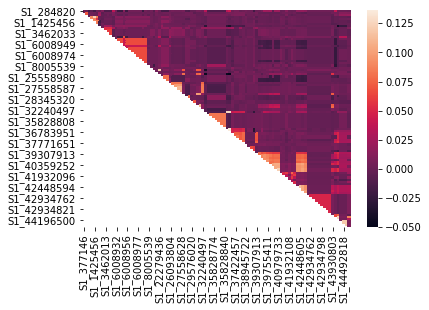

In [122]:
import seaborn as sb
sb.heatmap(df_D) 

# 짙은 색일수록 같이 일한다는 뜻

![linkage disequilibrium](https://www.researchgate.net/profile/Anita_Agarwal4/publication/7973573/figure/fig1/AS:394587525926917@1471088405512/Haploview-plot-defining-haplotype-block-structure-of-AMD-associated-region-The-relative.png)

---